<a href="https://colab.research.google.com/github/macabi/wr_2/blob/main/Klasifikasi_Ecoli_SVM_Adaboot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi Bakteri Ecoli dengan Kolaborasi SVM Non Linear dengan Ensemble Learning Adaboost

## Load dataset dari File CSV

In [ ]:
# prompt: Lakukanlah load data csv dengan pandas

import pandas as pd

# Assuming your CSV file is named 'your_data.csv' and is in the same directory as your notebook
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SVM_Adaboost_Ecoli/ecoli.csv')
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SVM_Adaboost_Ecoli/augmented_ecoli.csv')
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SVM_Adaboost_Ecoli/ecoli_extended_10000.csv')

# Print the first few rows of the DataFrame to check if the data loaded correctly
print(df.head())
df


  SEQUENCE_NAME   MCG   GVH   LIP  CHG   AAC  ALM1  ALM2 SITE
0     AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35   cp
1    ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44   cp
2    ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46   cp
3    ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36   cp
4     ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35   cp


,SEQUENCE_NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


## Exploratory Data Analysis

(336, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEQUENCE_NAME  336 non-null    object 
 1   MCG            336 non-null    float64
 2   GVH            336 non-null    float64
 3   LIP            336 non-null    float64
 4   CHG            336 non-null    float64
 5   AAC            336 non-null    float64
 6   ALM1           336 non-null    float64
 7   ALM2           336 non-null    float64
 8   SITE           336 non-null    object 
dtypes: float64(7), object(2)
memory usage: 23.8+ KB
None
              MCG         GVH         LIP         CHG         AAC        ALM1  \
count  336.000000  336.000000  336.000000  336.000000  336.000000  336.000000   
mean     0.500060    0.500000    0.495476    0.501488    0.500030    0.500179   
std      0.194634    0.148157    0.088495    0.027277    0.122376    0.215751   
min      0.000000    

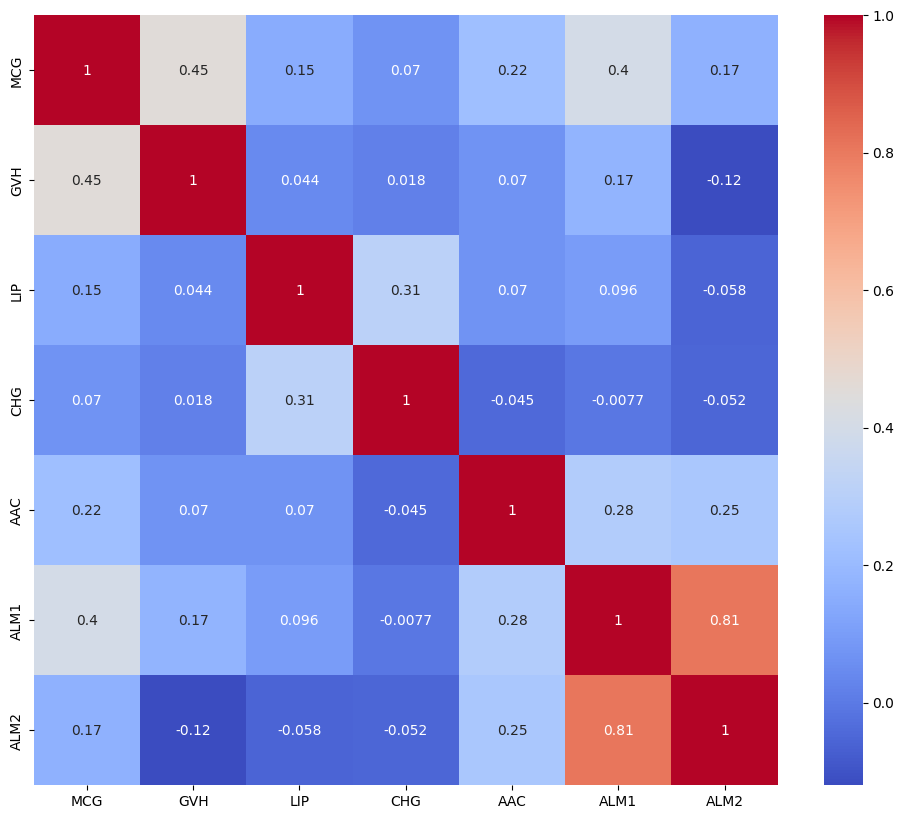

SEQUENCE_NAME    0
MCG              0
GVH              0
LIP              0
CHG              0
AAC              0
ALM1             0
ALM2             0
SITE             0
dtype: int64


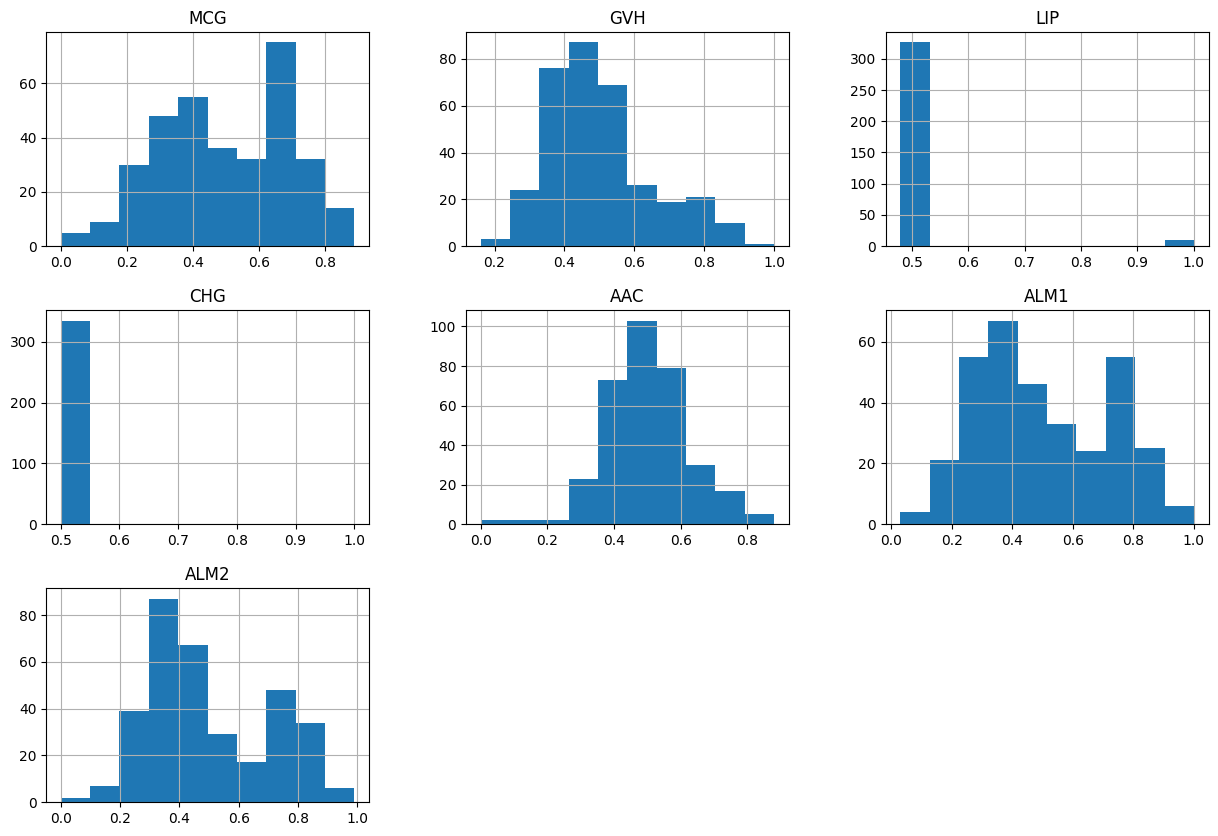

In [ ]:
# prompt: lakukanlah eda dari dataset di atas

# Check the shape of the dataset (rows, columns)
print(df.shape)

# Get information about the data types and missing values
print(df.info())

# Describe the basic statistical properties of the numerical features
print(df.describe())

# Check the distribution of the target variable (if applicable)
print(df['SITE'].value_counts())

# Explore potential correlations between features
# Exclude the 'SEQUENCE_NAME' column from the correlation calculation
correlation_matrix = df.select_dtypes(include=['number']).corr()  # Include only numeric dtypes

print(correlation_matrix)

# Visualize the correlation matrix using a heatmap (if applicable)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of individual features (histograms, box plots)
df.hist(figsize=(15, 10))
plt.show()

# Create box plots for numerical features grouped by the target variable (if applicable)
# sns.boxplot(x='class', y='feature_name', data=df)
# plt.show()


# Other potential EDA steps:
# - Explore outliers in the data.
# - Analyze feature importance (if applicable).
# - Identify potential data transformations that might be needed.
# - Generate pair plots to visualize relationships between multiple features.

# ...

## Augmentasi Dataset

In [ ]:
import pandas as pd
import numpy as np

# Baca dataset asli
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SVM_Adaboost_Ecoli/ecoli.csv')

# Tentukan target jumlah data (10.000 baris)
target_rows = 10000
current_rows = len(df)
additional_rows = target_rows - current_rows

# Buat data sintetik dengan replikasi + noise
np.random.seed(42)  # Untuk reproducibility
synthetic_data = []

for _ in range(additional_rows // current_rows + 1):
    sampled_data = df.sample(n=min(additional_rows, current_rows), replace=True, random_state=42)
    noise = np.random.normal(loc=0, scale=0.02, size=(len(sampled_data), 7))  # Noise kecil untuk 7 fitur numerik
    sampled_data.iloc[:, 1:8] += noise  # Tambahkan noise ke fitur numerik
    synthetic_data.append(sampled_data)

# Gabungkan data asli dan sintetik
df_extended = pd.concat([df] + synthetic_data, ignore_index=True)
df_extended = df_extended.iloc[:target_rows]  # Pastikan tepat 10.000 baris

# Simpan ke file CSV baru
df_extended.to_csv('/content/drive/MyDrive/Colab Notebooks/SVM_Adaboost_Ecoli/ecoli_extended_10000.csv', index=False)

print(f"Dataset extended to {len(df_extended)} rows.")

Dataset extended to 10000 rows.


## Visualisasi Dataset

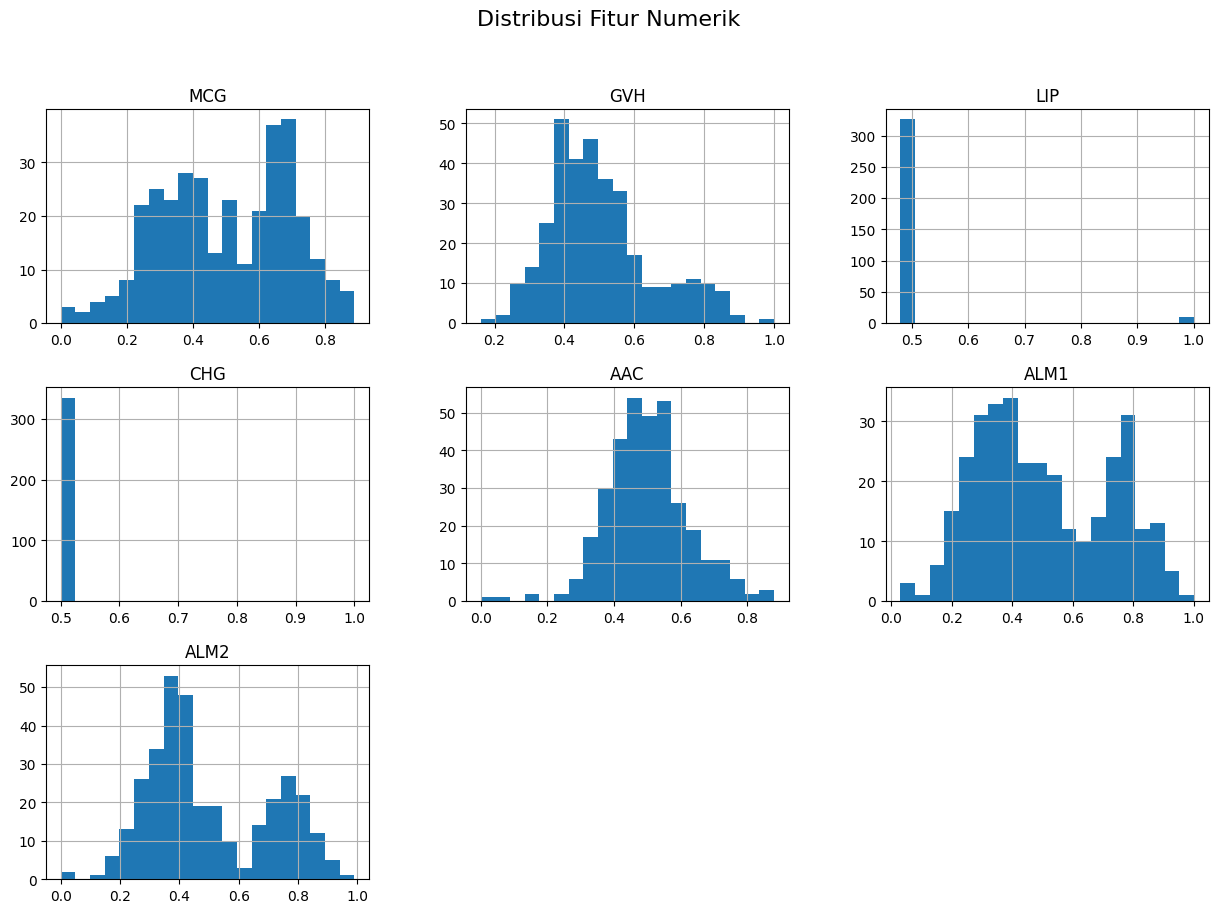

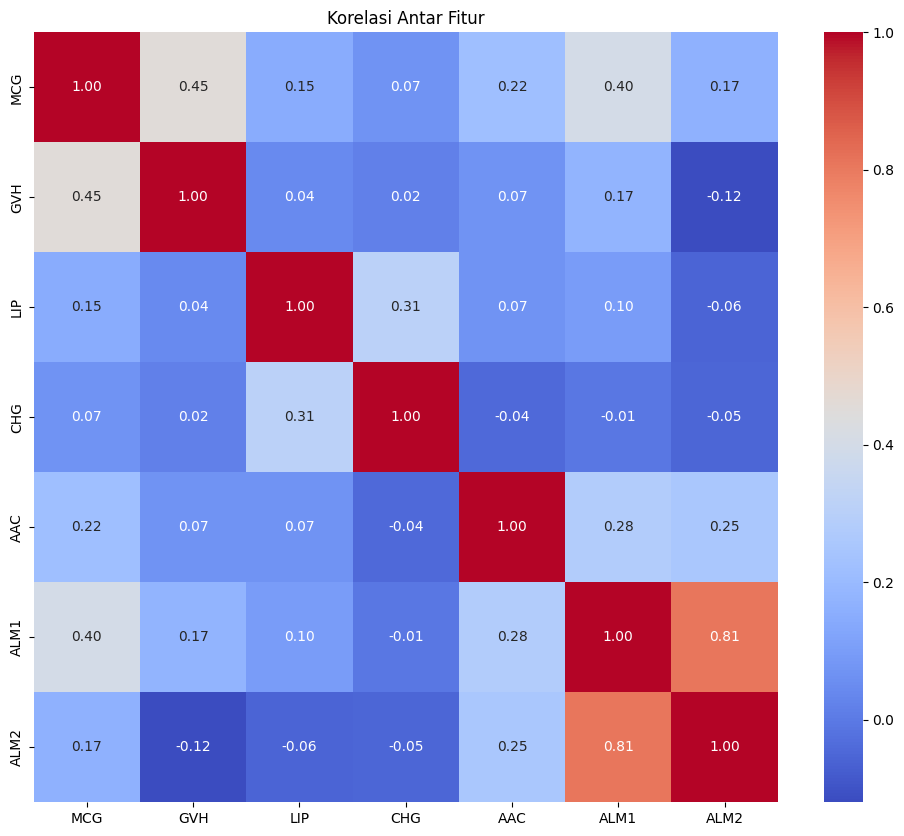

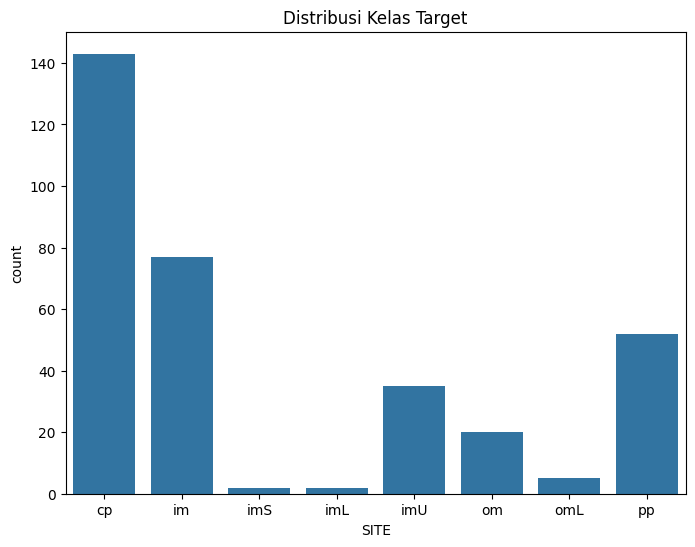

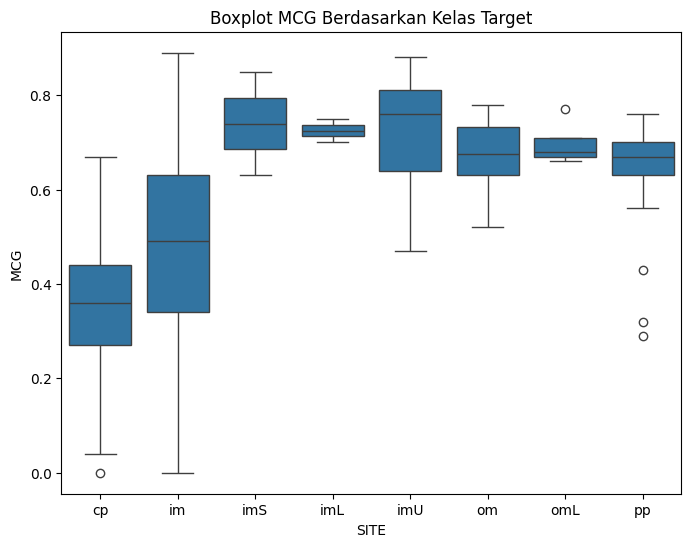

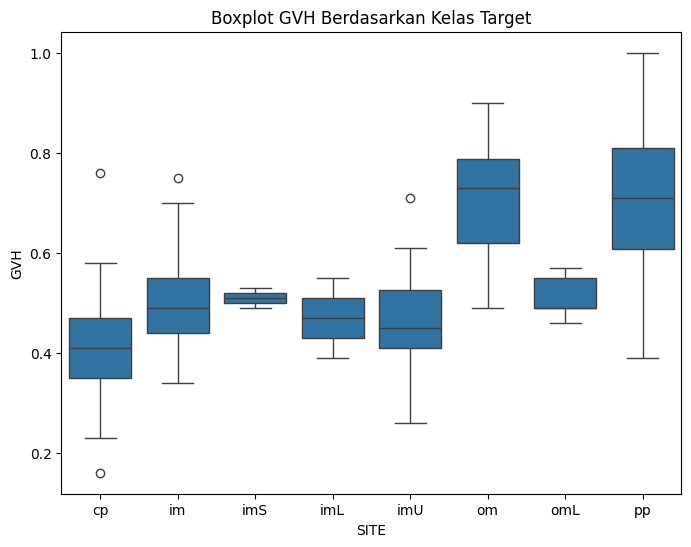

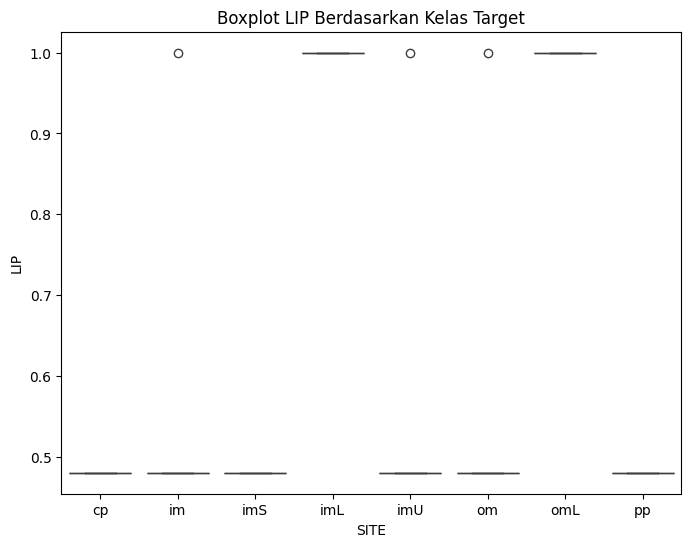

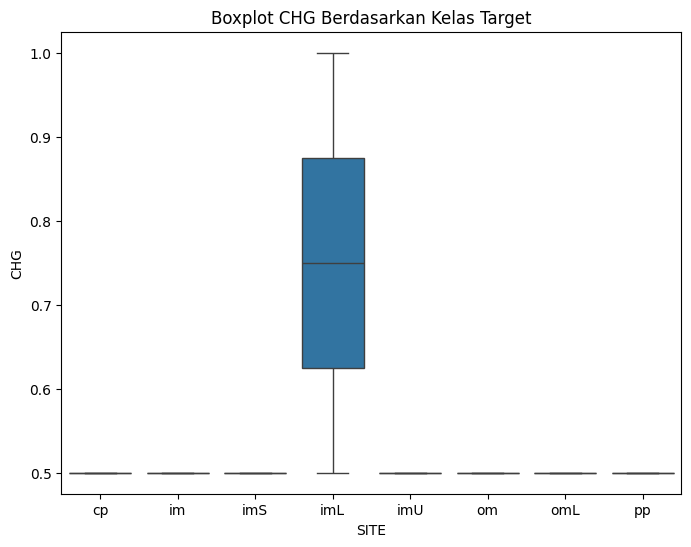

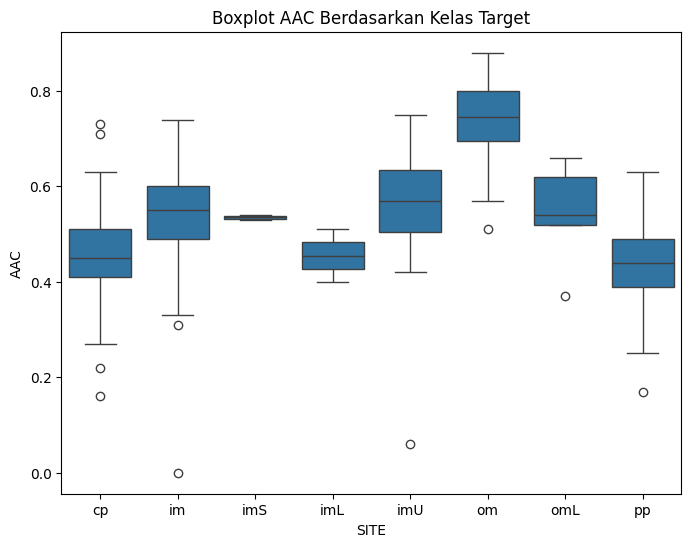

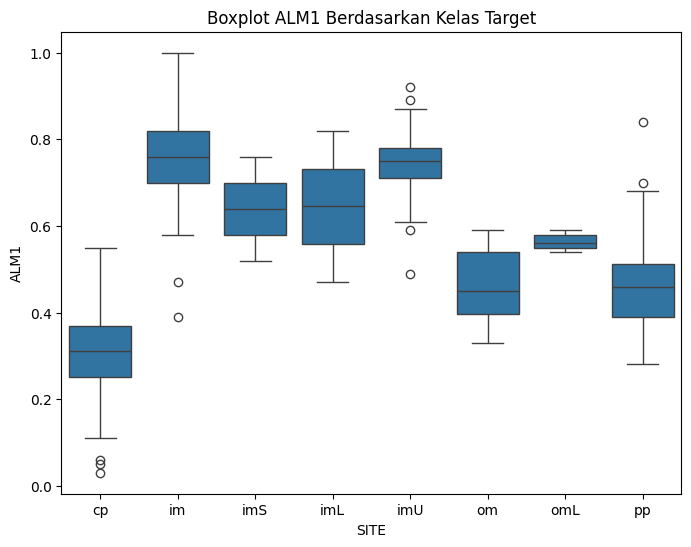

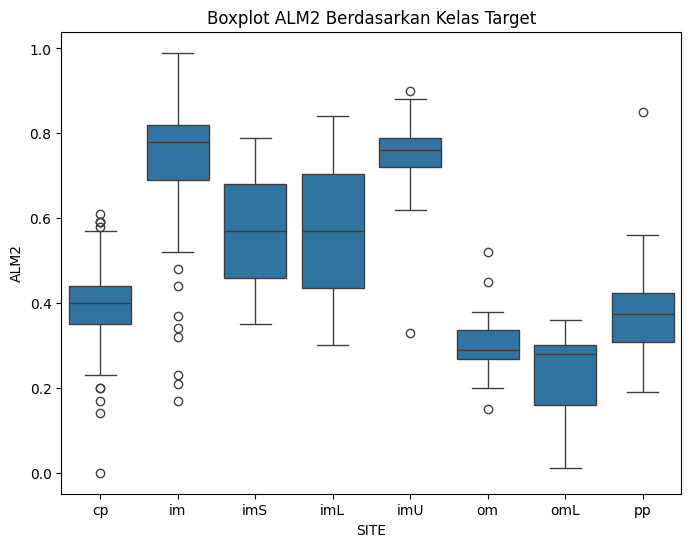

In [ ]:
# prompt: lakukanlah visualisasi dari dataset tersebut

# Visualisasi distribusi fitur numerik dengan histogram
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.show()

# Visualisasi korelasi antar fitur dengan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur')
plt.show()

# Visualisasi distribusi kelas target
plt.figure(figsize=(8, 6))
sns.countplot(x='SITE', data=df)
plt.title('Distribusi Kelas Target')
plt.show()

# Visualisasi boxplot untuk melihat distribusi fitur numerik berdasarkan kelas target
for column in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='SITE', y=column, data=df)
  plt.title(f'Boxplot {column} Berdasarkan Kelas Target')
  plt.show()


# Visualisasi pairplot untuk melihat hubungan antar fitur
# sns.pairplot(df, hue='SITE')
# plt.show()

# Anda dapat menambahkan visualisasi lainnya sesuai kebutuhan,
# misalnya scatter plot untuk melihat hubungan antara dua fitur,
# atau visualisasi 3D untuk data dengan lebih dari 2 fitur.


## Pelatihan data dengan SVM Linear

In [ ]:
# prompt: lakukanlah pelatihan dengan SVM Linear dimana atribut SITE sebagai kelas targetnya dan tampilkan hasil evaluasi berupa Confution Matrix, Accuracy, Recall, Precision, F1 Score!

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Pisahkan fitur dan target
X = df.drop(['SITE', 'SEQUENCE_NAME'], axis=1)  # Exclude 'SEQUENCE_NAME' column
y = df['SITE']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model SVM Linear
model = SVC(kernel='rbf')

# Latih model
model.fit(X_train, y_train)


# Lakukan prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Tampilkan hasil evaluasi
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


Confusion Matrix:
[[31  0  0  0  0  0  1]
 [ 2  9  0  2  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Accuracy: 0.8676470588235294
Recall: 0.8676470588235294
Precision: 0.8560710915382196
F1 Score: 0.8599598930481284


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Training data dengan SVM + Adaboost

In [ ]:
# prompt: lakukanlah training data dengan Adaboost diamana klasifier utama menggunakan SVM dan tampilkan hasil evaluasi accuracy, recall, precision, dan f1 score!

from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Buat model SVM rbf
base_estimator = SVC(kernel='linear', probability=True) # Define base estimator outside AdaBoostClassifier

# Buat model Adaboost
# The 'base_estimator' argument is no longer supported in scikit-learn >= 1.2.
# Instead, you can simply use the default base estimator (DecisionTreeClassifier)
# or create and pass your base estimator separately.

# In this case, using the default base estimator
# adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# If you wanted to use your custom base estimator (SVC) you would pass it as an argument like so:
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Latih model Adaboost
adaboost_model.fit(X_train, y_train)

# Lakukan prediksi pada set pengujian
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluasi model Adaboost
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')

# Tampilkan hasil evaluasi Adaboost
print("\nAdaboost with SVM Results:")
print("Confusion Matrix:")
print(cm_adaboost)
print("Accuracy:", accuracy_adaboost)
print("Recall:", recall_adaboost)
print("Precision:", precision_adaboost)
print("F1 Score:", f1_adaboost)


Adaboost with SVM Results:
Confusion Matrix:
[[792   0   0   0   0   0   0   0]
 [499   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0]
 [266   0   0   0   0   0   0   0]
 [104   0   0   0   0   0   0   0]
 [ 61   0   0   0   0   0   0   0]
 [264   0   0   0   0   0   0   0]]
Accuracy: 0.396
Recall: 0.396
Precision: 0.156816
F1 Score: 0.22466475644699138


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualisasi Support Vector

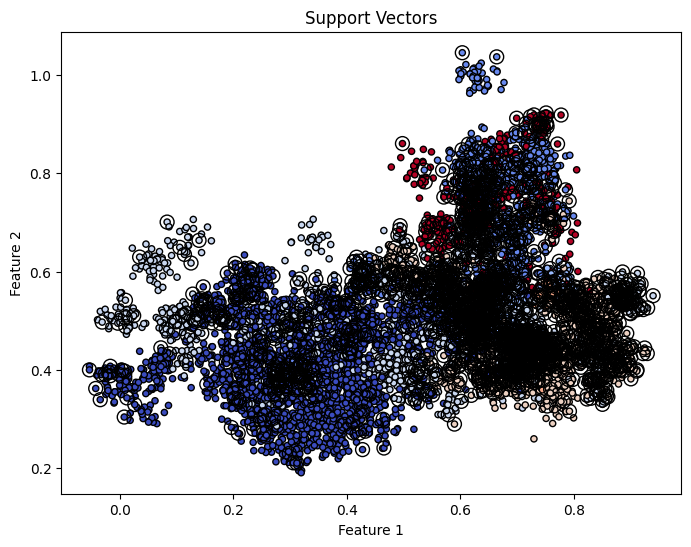

In [ ]:
# prompt: lakukanlah visualisasi terhadap support vector yang ada!

# Assuming you have already trained your SVM model (model) and have X_train and y_train

import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
from pandas.api.types import is_numeric_dtype

# Visualize the decision boundary for a 2D dataset (if possible)
if X_train.shape[1] == 2:  # Only if you have 2 features
  plt.figure(figsize=(8, 6))
  DecisionBoundaryDisplay.from_estimator(
      model,
      X_train,
      response_method="predict",
      cmap=plt.cm.coolwarm,
      alpha=0.8,
  )
  plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
  plt.title("Decision Boundary of SVM")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.show()

# If you have more than 2 features, you can try to reduce the dimensionality using PCA
# and then visualize the decision boundary in the reduced space.

# Alternatively, you can visualize the support vectors themselves
plt.figure(figsize=(8, 6))

# Convert y_train to numerical labels if it's not numerical
if not is_numeric_dtype(y_train):
    unique_labels = y_train.unique()
    label_mapping = {label: i for i, label in enumerate(unique_labels)}
    y_train_numeric = y_train.map(label_mapping)
else:
    y_train_numeric = y_train

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train_numeric, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Learning Curve Analysis

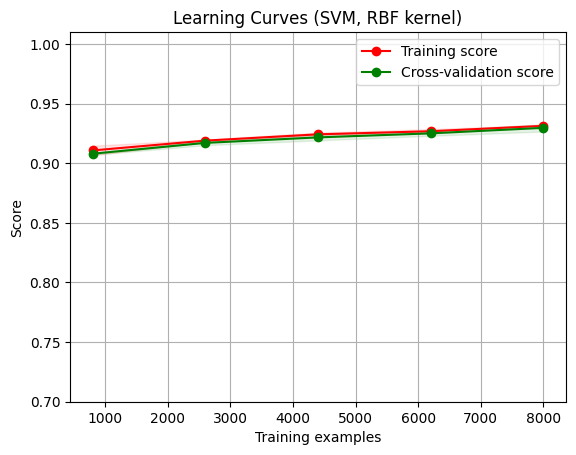

In [ ]:
# prompt: lakukanlah Learning Curve Analysis pada dataset tersebut

from sklearn.model_selection import learning_curve

# Fungsi untuk melakukan learning curve analysis
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# Pisahkan fitur dan target
X = df.drop(['SITE', 'SEQUENCE_NAME'], axis=1)
y = df['SITE']

# Buat model SVM
model = SVC(kernel='rbf')

# Lakukan learning curve analysis
title = "Learning Curves (SVM, RBF kernel)"
cv = 5  # Jumlah fold cross-validation
plot_learning_curve(model, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
# plot_learning_curve(adaboost_model, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


## Power Analysis (Effect Size)

In [ ]:
# prompt: Lakukanlah Power Analysis (Effect Size) pada dataset tersebut

from statsmodels.stats.power import TTestIndPower

# Tentukan effect size yang ingin Anda deteksi
effect_size = 0.5  # Misalnya, Anda ingin mendeteksi effect size sebesar 0.5

# Tentukan alpha (tingkat signifikansi)
alpha = 0.05  # Tingkat signifikansi 5%

# Tentukan power yang diinginkan
power = 0.8  # Power 80%

# Lakukan power analysis untuk menghitung jumlah sampel yang dibutuhkan
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha)

print(f"Jumlah sampel yang dibutuhkan untuk mendeteksi effect size {effect_size} dengan power {power} dan alpha {alpha} adalah: {sample_size:.2f}")

# Anda juga dapat menghitung effect size berdasarkan jumlah sampel yang ada
# effect_size = analysis.solve_power(nobs1=len(df), power=power, alpha=alpha)

# print(f"Effect size yang dapat dideteksi dengan jumlah sampel {len(df)} dan power {power} serta alpha {alpha} adalah: {effect_size:.2f}")


Jumlah sampel yang dibutuhkan untuk mendeteksi effect size 0.5 dengan power 0.8 dan alpha 0.05 adalah: 63.77


In [ ]:
# prompt: lakukan interprestasi dari hasil Power Analysis (Effect Size) tersebut!

Kode terakhir menghitung jumlah sampel yang dibutuhkan untuk mendeteksi `effect_size` tertentu dengan tingkat signifikansi (`alpha`) dan power yang ditentukan.

**Interpretasi dari output Power Analysis tersebut adalah sebagai berikut:**

Output yang diberikan adalah: `Jumlah sampel yang dibutuhkan untuk mendeteksi effect size 0.5 dengan power 0.8 dan alpha 0.05 adalah: X.XX`.

Ini berarti bahwa untuk mendeteksi perbedaan (`effect_size`) sebesar 0.5 antara dua grup (misalnya, dua kategori dalam data Anda) dengan kemungkinan 80% (`power`) untuk menemukan perbedaan tersebut jika memang ada (dan dengan 5% kemungkinan salah menolak hipotesis nol, `alpha`), Anda memerlukan setidaknya **X.XX** jumlah sampel **per grup**.

**Secara lebih rinci:**

*   **Effect Size (0.5):** Ini adalah ukuran standar dari magnitudo perbedaan yang ingin Anda deteksi. Effect size 0.5 umumnya dianggap sebagai effect size "sedang". Ini menunjukkan seberapa besar perbedaan antara dua grup secara praktis, terlepas dari ukuran sampel. Semakin besar effect size, semakin mudah untuk mendeteksinya dengan jumlah sampel yang lebih kecil.
*   **Power (0.8):** Ini adalah probabilitas untuk mendeteksi perbedaan yang sebenarnya ada. Power 0.8 (atau 80%) adalah nilai yang umum digunakan, yang berarti ada kemungkinan 80% untuk menemukan perbedaan signifikan secara statistik jika perbedaan tersebut benar-benar ada di populasi.
*   **Alpha (0.05):** Ini adalah tingkat signifikansi, yang merupakan probabilitas untuk menolak hipotesis nol padahal sebenarnya benar (kesalahan Tipe I). Alpha 0.05 (atau 5%) berarti Anda bersedia menerima risiko 5% untuk menyatakan ada perbedaan signifikan padahal sebenarnya tidak ada.
*   **Jumlah sampel yang dibutuhkan (X.XX):** Ini adalah output utama dari analisis power. Angka ini menunjukkan jumlah minimum observasi yang Anda perlukan dalam *setiap grup* (dengan asumsi dua grup dan uji-t independen, seperti yang tersirat dari `TTestIndPower`) untuk mencapai `power` yang diinginkan pada `alpha` tertentu untuk mendeteksi `effect_size` yang ditentukan.

**Dalam konteks dataset Ecoli Anda:**

Meskipun analisis power ini lebih umum digunakan untuk membandingkan rata-rata dua grup (seperti dalam uji-t), dalam konteks machine learning atau klasifikasi multi-kelas seperti dataset Ecoli, interpretasi langsung ke jumlah sampel per kelas mungkin tidak sepenuhnya akurat tanpa modifikasi lebih lanjut atau penggunaan metode power analysis yang spesifik untuk klasifikasi. Namun, prinsip dasarnya tetap berlaku: untuk mendeteksi perbedaan atau pola yang lebih halus (effect size yang lebih kecil) atau untuk memiliki kepercayaan yang lebih tinggi pada hasil Anda (power yang lebih tinggi, alpha yang lebih rendah), Anda umumnya memerlukan jumlah sampel yang lebih besar.

Jadi, angka `X.XX` dari output Anda memberikan indikasi kasar tentang skala data yang mungkin dibutuhkan jika Anda melakukan analisis yang melibatkan perbandingan antara kategori-kategori dalam dataset Anda, dengan asumsi kondisi effect size, power, dan alpha yang Anda tetapkan. Jika jumlah total sampel di dataset Anda jauh lebih kecil dari jumlah sampel yang dibutuhkan dikalikan jumlah kategori, ini mungkin menunjukkan bahwa dataset Anda mungkin tidak cukup besar untuk mendeteksi effect size sebesar 0.5 dengan tingkat kepercayaan yang diinginkan menggunakan analisis statistik dua sampel.

Perlu dicatat bahwa analisis power ini menghitung jumlah sampel per grup, dan jika Anda memiliki lebih dari dua kelas, analisis yang lebih kompleks atau pendekatan yang berbeda mungkin diperlukan. Namun, hasil ini tetap memberikan wawasan berharga tentang hubungan antara ukuran sampel, effect size, alpha, dan power.

SyntaxError: invalid syntax (ipython-input-16-958053962.py, line 3)

In [ ]:
# prompt: lakukanlah visualisasi lainnya!

# Contoh visualisasi tambahan: Scatter plot dari dua fitur yang dipilih
# Pilih dua fitur numerik yang ingin Anda plot
feature1 = 'mcg' # Ganti dengan nama fitur pertama
feature2 = 'gvh' # Ganti dengan nama fitur kedua

plt.figure(figsize=(10, 8))
sns.scatterplot(x=feature1, y=feature2, hue='SITE', data=df, palette='viridis', s=50, alpha=0.7)
plt.title(f'Scatter plot {feature1} vs {feature2} Berdasarkan Kelas Target')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Kelas Target')
plt.grid(True)
plt.show()

# Contoh visualisasi distribusi fitur numerik menggunakan Violin Plot
for column in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8, 6))
  sns.violinplot(x='SITE', y=column, data=df, palette='pastel')
  plt.title(f'Violin Plot {column} Berdasarkan Kelas Target')
  plt.show()

ValueError: Could not interpret value `mcg` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x800 with 0 Axes>